In [1]:
import os
import sys
sys.path.append('../')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("../input/features.csv")

In [3]:
df.head(3)

,ip,user_agent,session,num_requests,img_to_req(%),4xx(%),Head(%),std_path_length,consq_rep_path(%),ave_response_len,sum_response_len,ave_response_time,sum_response_time,session_duration,ave_time_per_page,robot_txt,is_bot
0,1.81.122.235,Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like M...,0,7,0.000000,0.0,0.0,0.000000,85.714286,108702.714286,760919,41.714286,292.0,6.900000,1.150000,0,0
1,10.92.2.8,Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-...,0,28,28.571429,0.0,0.0,0.507875,71.428571,48159.571429,1348468,25.428571,712.0,0.166667,0.006173,0,0
2,100.92.35.41,Mozilla/5.0 (Linux; Android 9; SM-A205F) Apple...,0,12,0.000000,0.0,0.0,0.834847,50.000000,100601.416667,1207217,26.333333,316.0,0.216667,0.019697,0,0


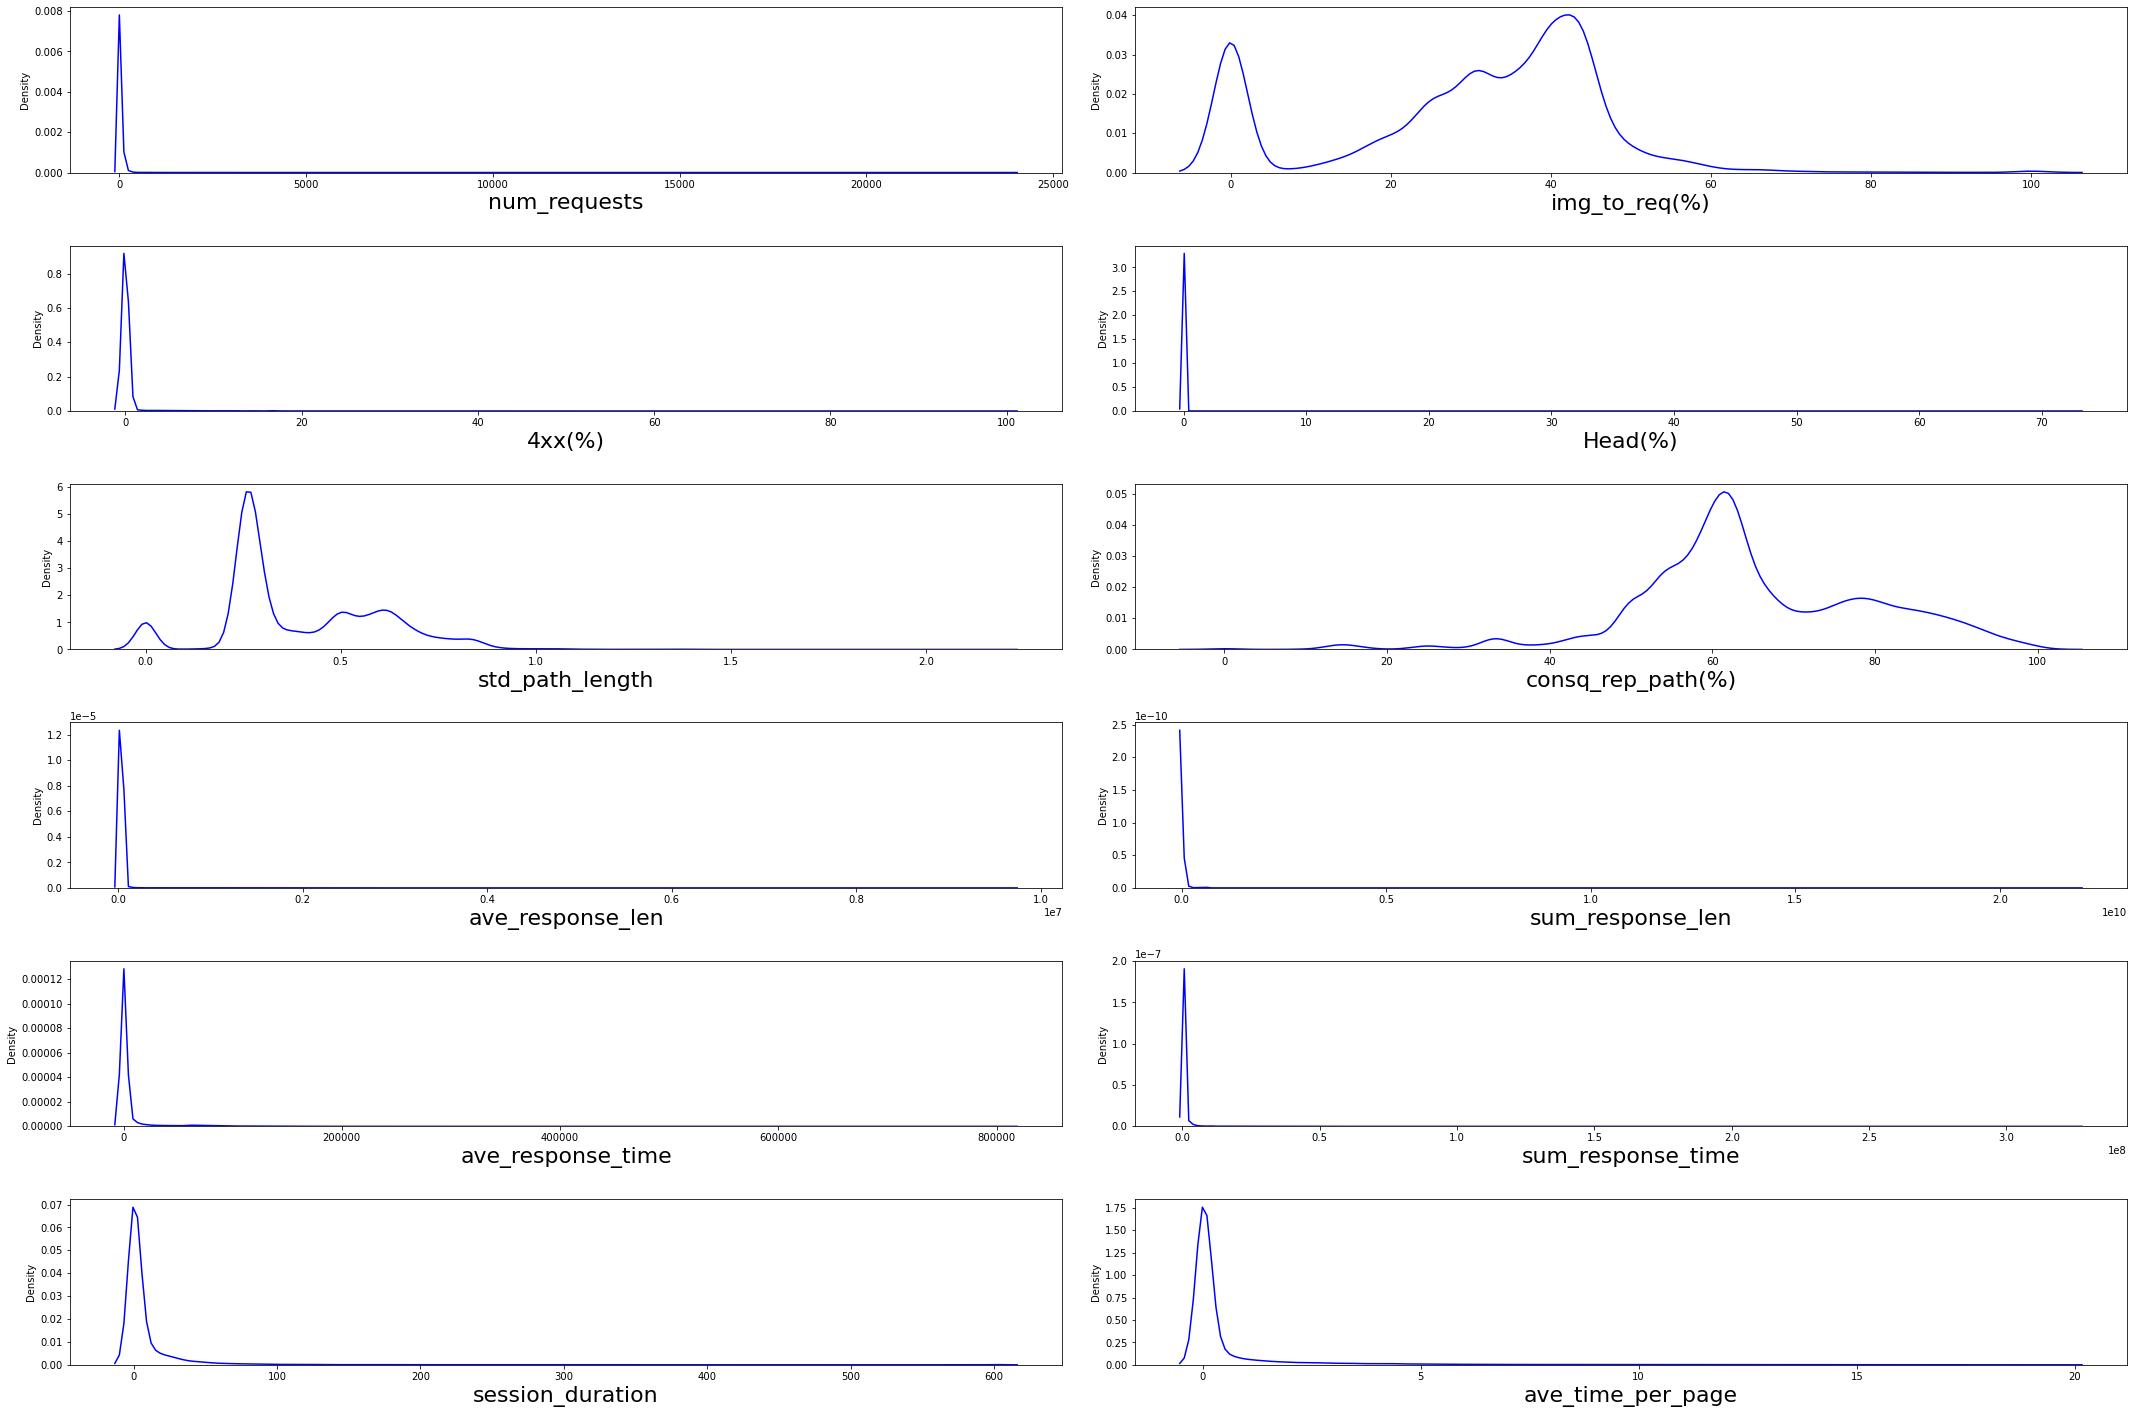

In [4]:
fig, axes = plt.subplots(6,2, figsize=(30, 20))
axes = axes.ravel()

features = df.drop(["ip","user_agent", "session", "is_bot", "robot_txt"], axis=1).columns

for idx, ax in enumerate(axes):
    col = features[idx]
    sns.kdeplot(data=df , x=col,  ax=ax, color='blue')
    ax.set_xlabel(col, fontsize = 22)

plt.tight_layout(pad = 2)
plt.show()

### Power Transformation

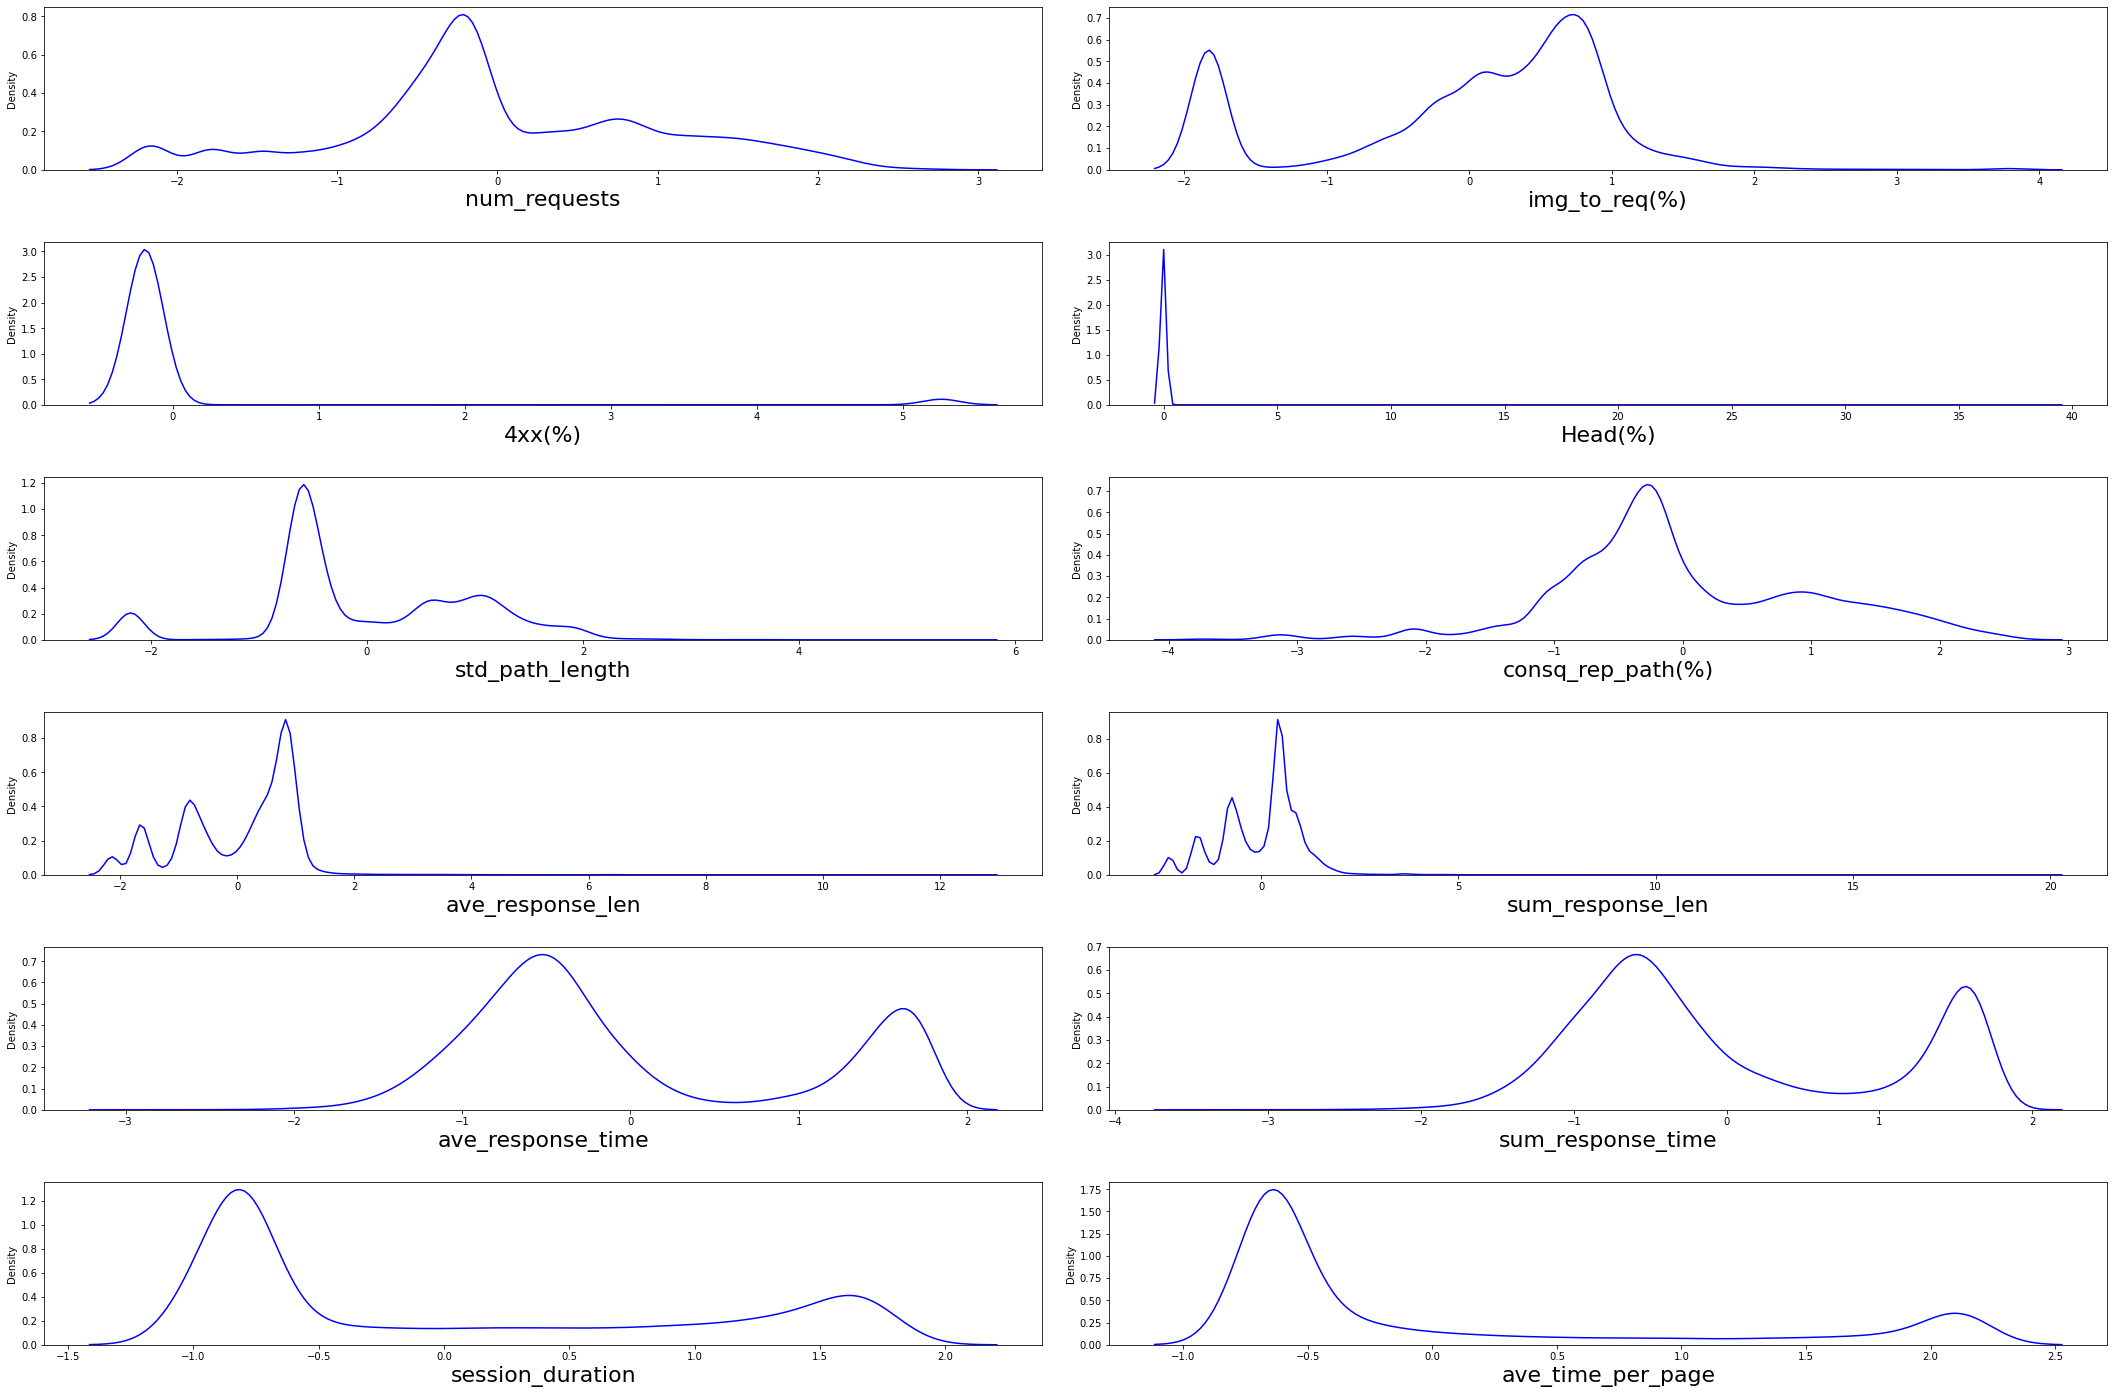

In [5]:
plt.figure(figsize=(30,20))
scaler = PowerTransformer()

df_scaled = df.copy()

for idx, feature in enumerate(features):
    df_scaled[feature] = scaler.fit_transform(df[feature].values.reshape(-1,1))
    ax = plt.subplot(6,2, idx + 1)
    
    sns.kdeplot(data = df_scaled, x = feature,  ax=ax, color='blue')
    ax.set_xlabel(feature, fontsize = 22)

plt.tight_layout(pad = 3)
plt.show()

### QuantileTransformer

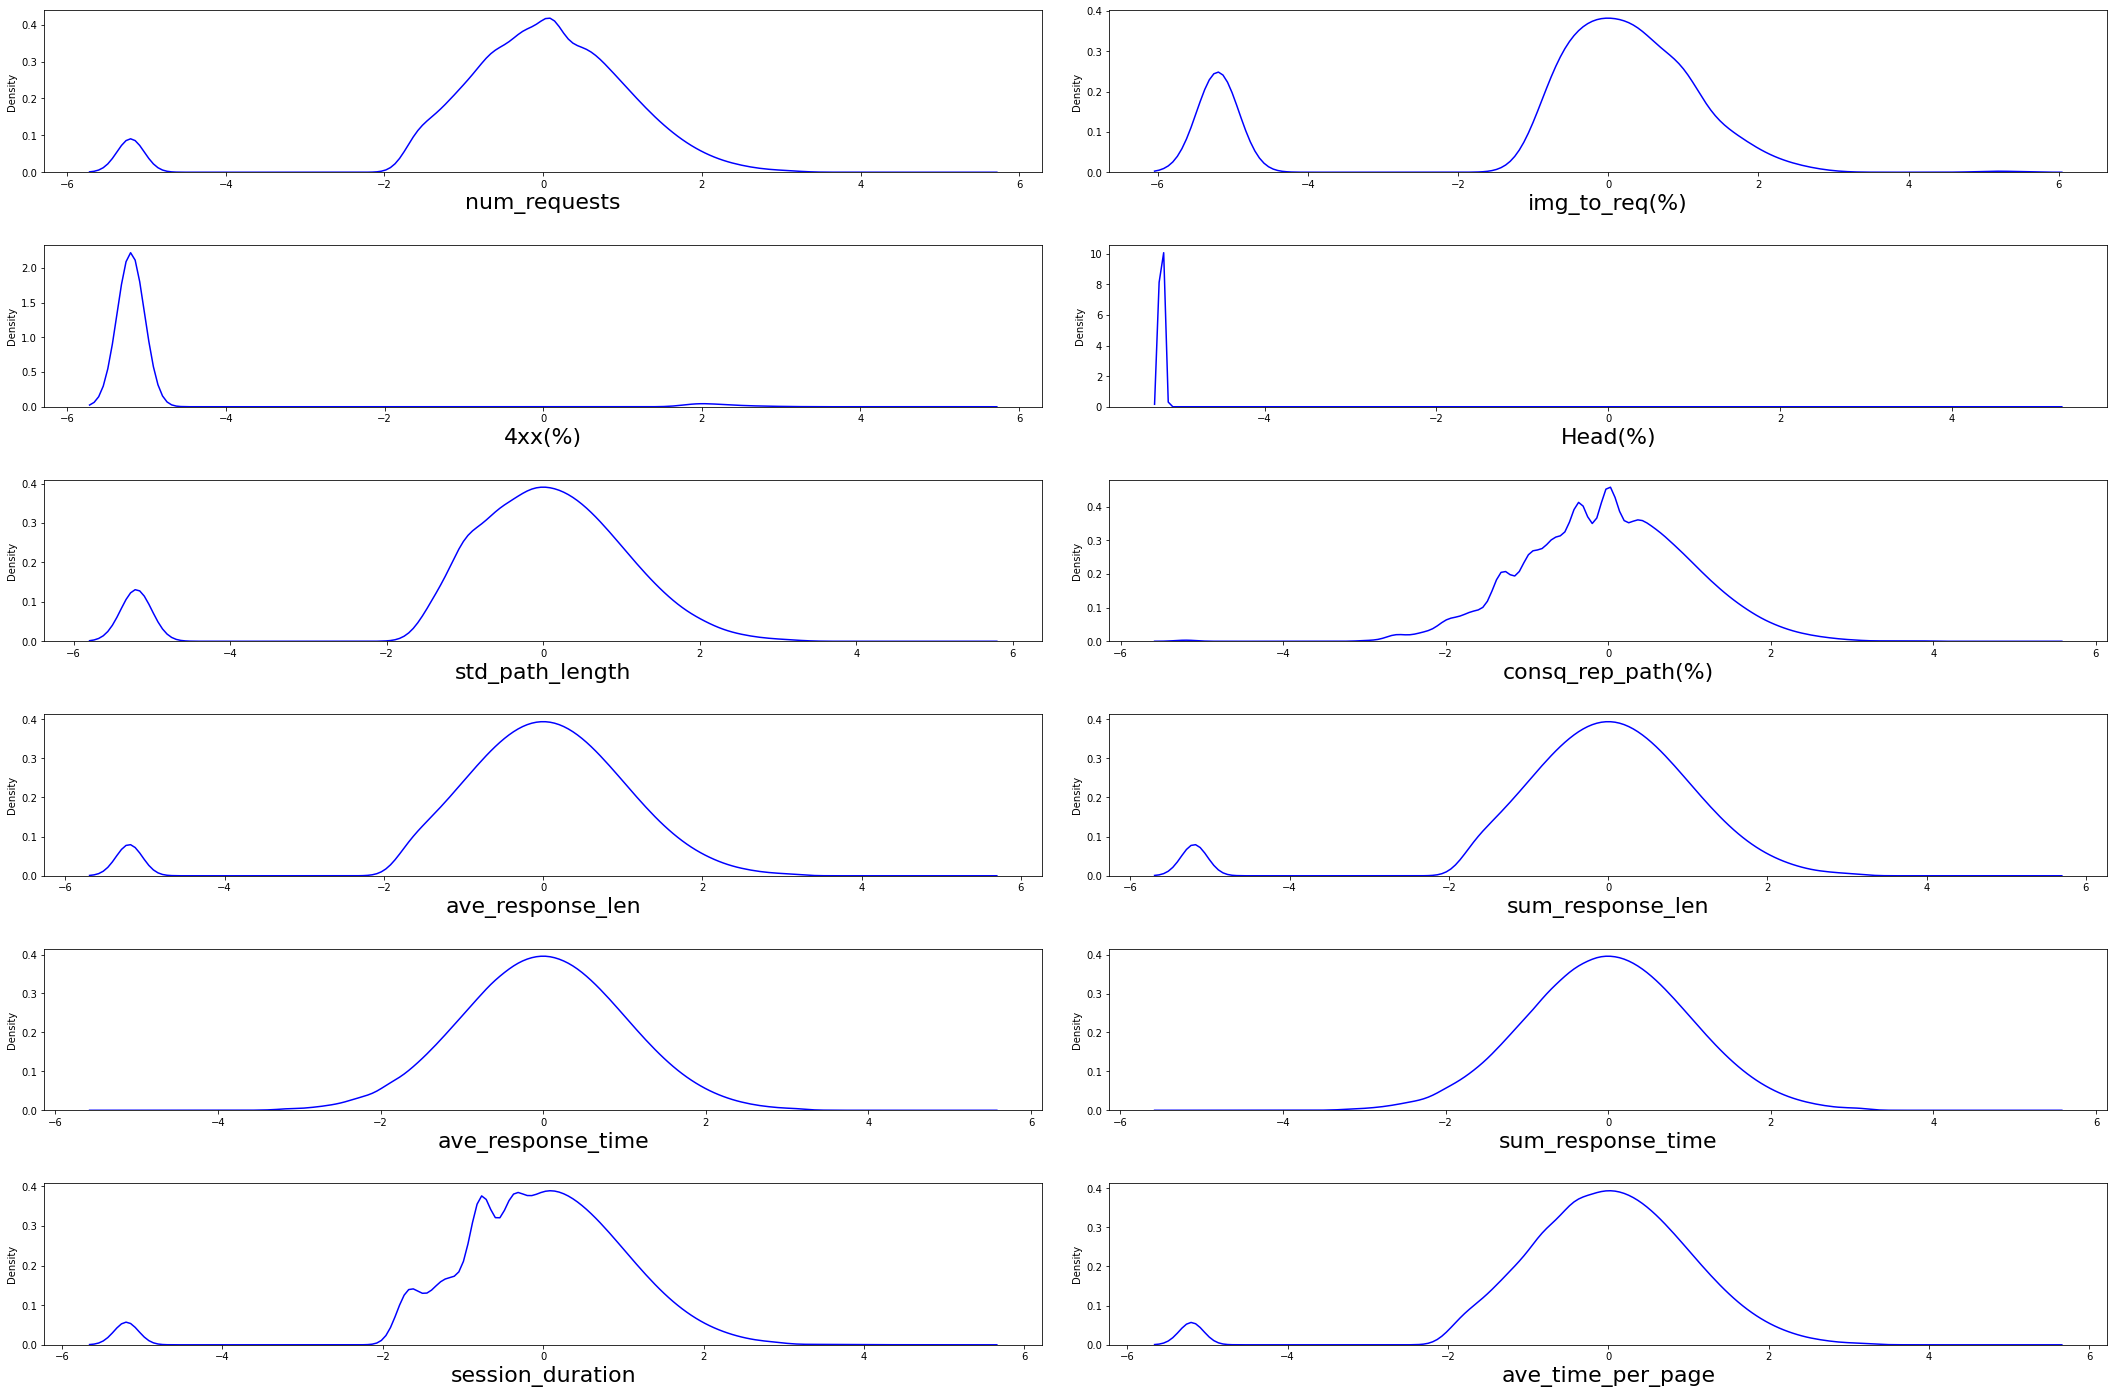

In [6]:
plt.figure(figsize=(30,20))
scaler = QuantileTransformer(output_distribution="normal", n_quantiles=1000)

df_scaled = df.copy()

for idx, feature in enumerate(features):
    df_scaled[feature] = scaler.fit_transform(df[feature].values.reshape(-1,1))
    ax = plt.subplot(6,2, idx + 1)
    
    sns.kdeplot(data = df_scaled, x = feature,  ax=ax, color='blue')
    ax.set_xlabel(feature, fontsize = 22)

plt.tight_layout(pad = 3)
plt.show()

### Logarithmic transformation

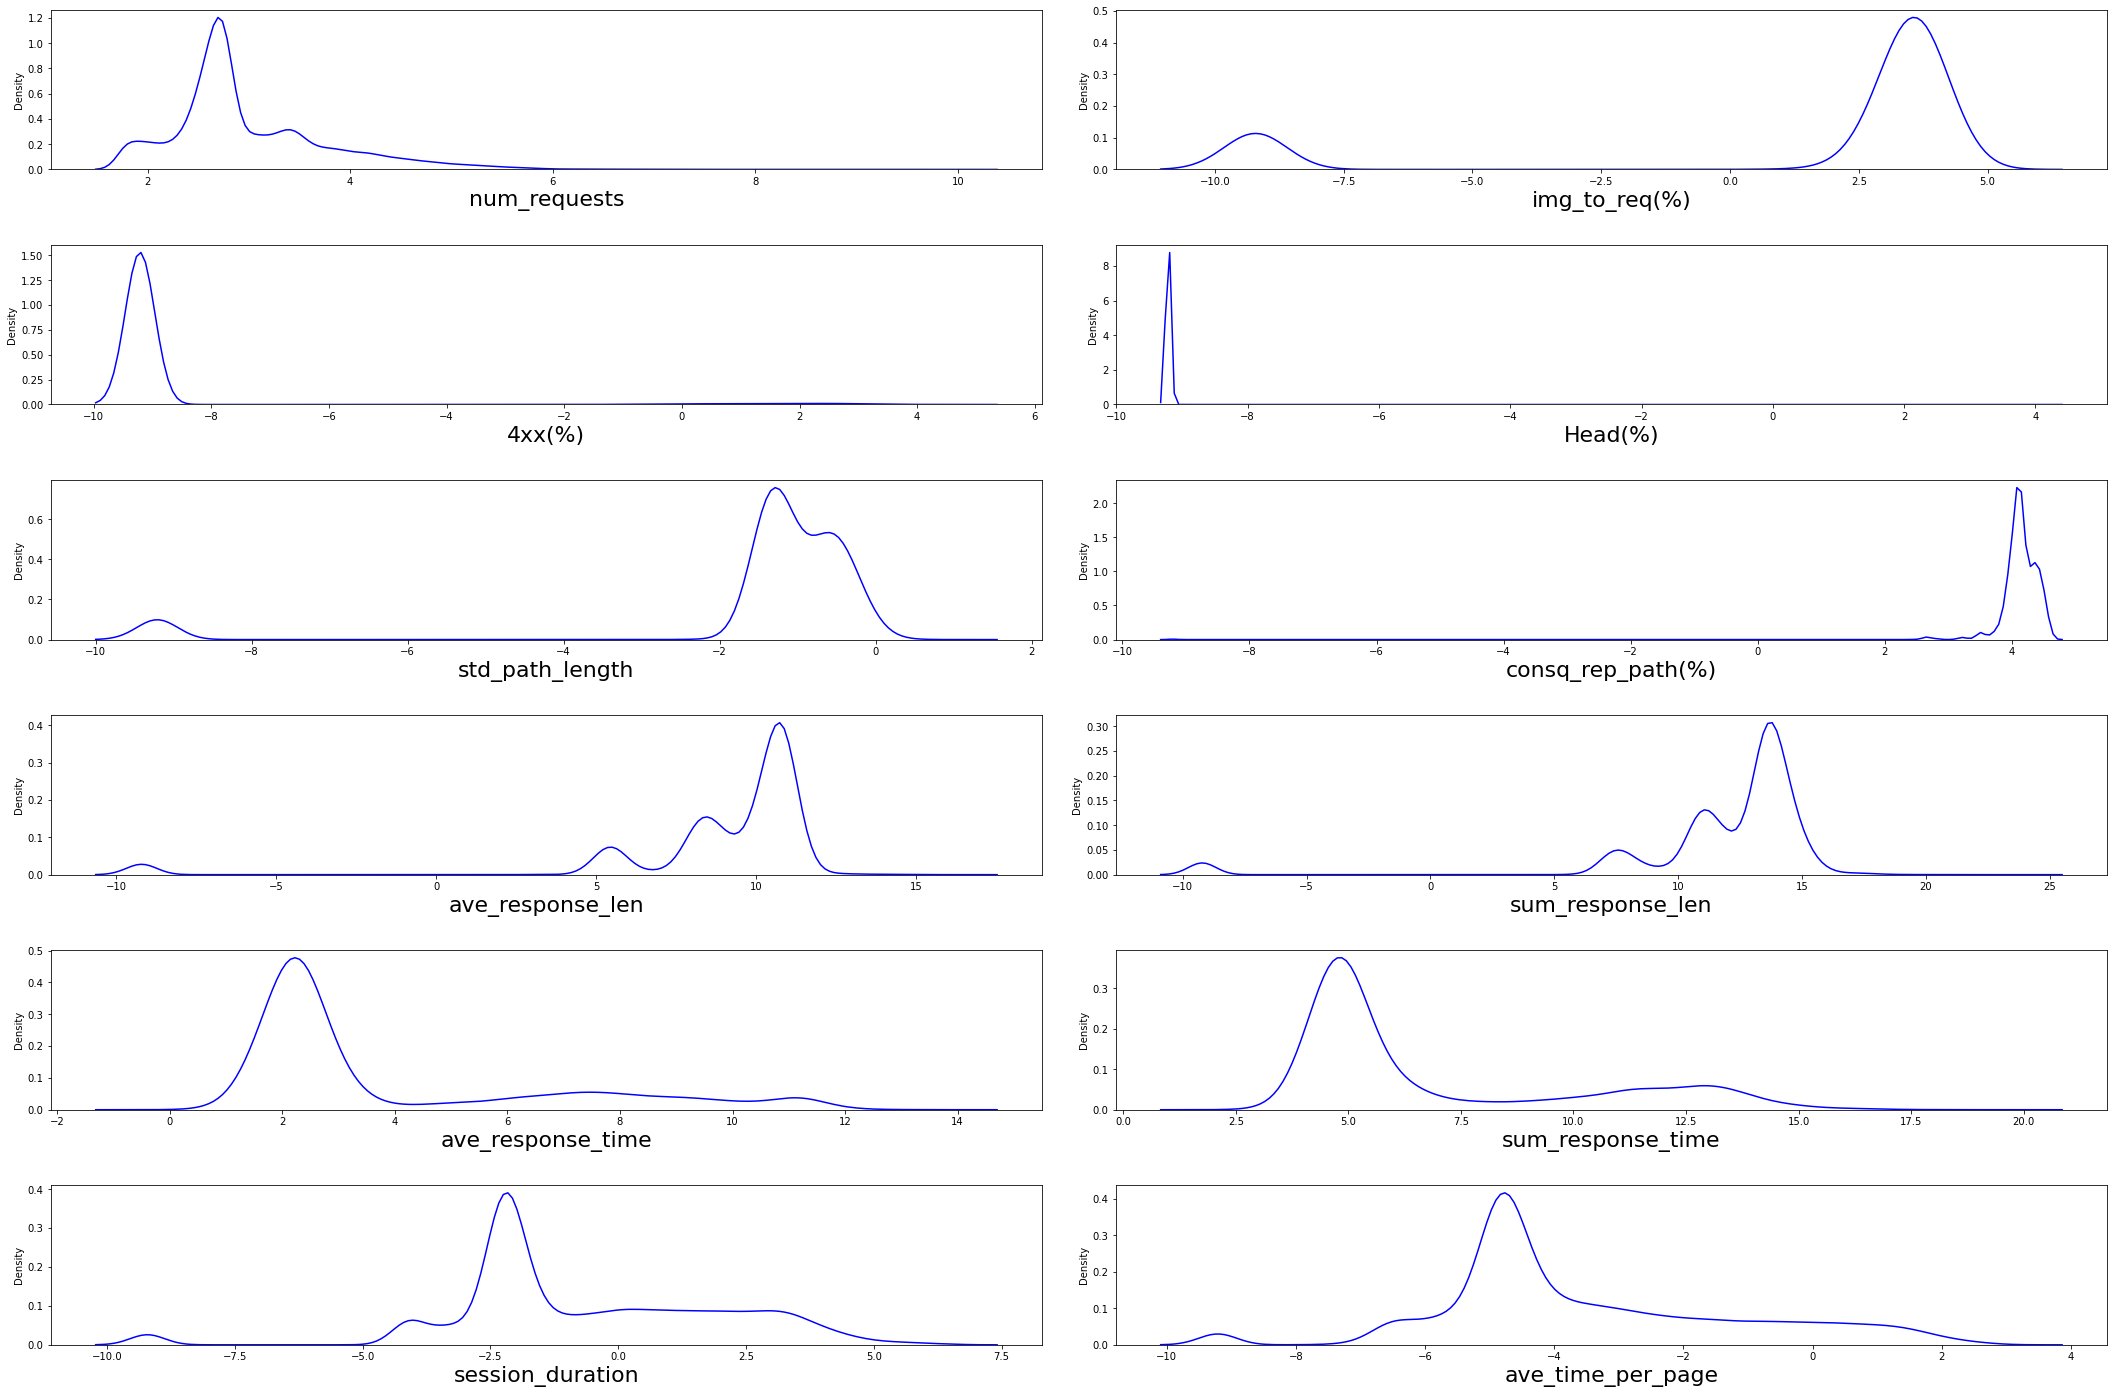

In [7]:
plt.figure(figsize=(30,20))

for idx, feature in enumerate(features):
    transformed_data = np.log(df[feature]+0.0001)
    ax = plt.subplot(6,2, idx + 1)
    
    sns.kdeplot(transformed_data,  ax=ax, color='blue')
    ax.set_xlabel(feature, fontsize = 22)

plt.tight_layout(pad = 3)
plt.show()
    
    

### Reciprocal Transformation

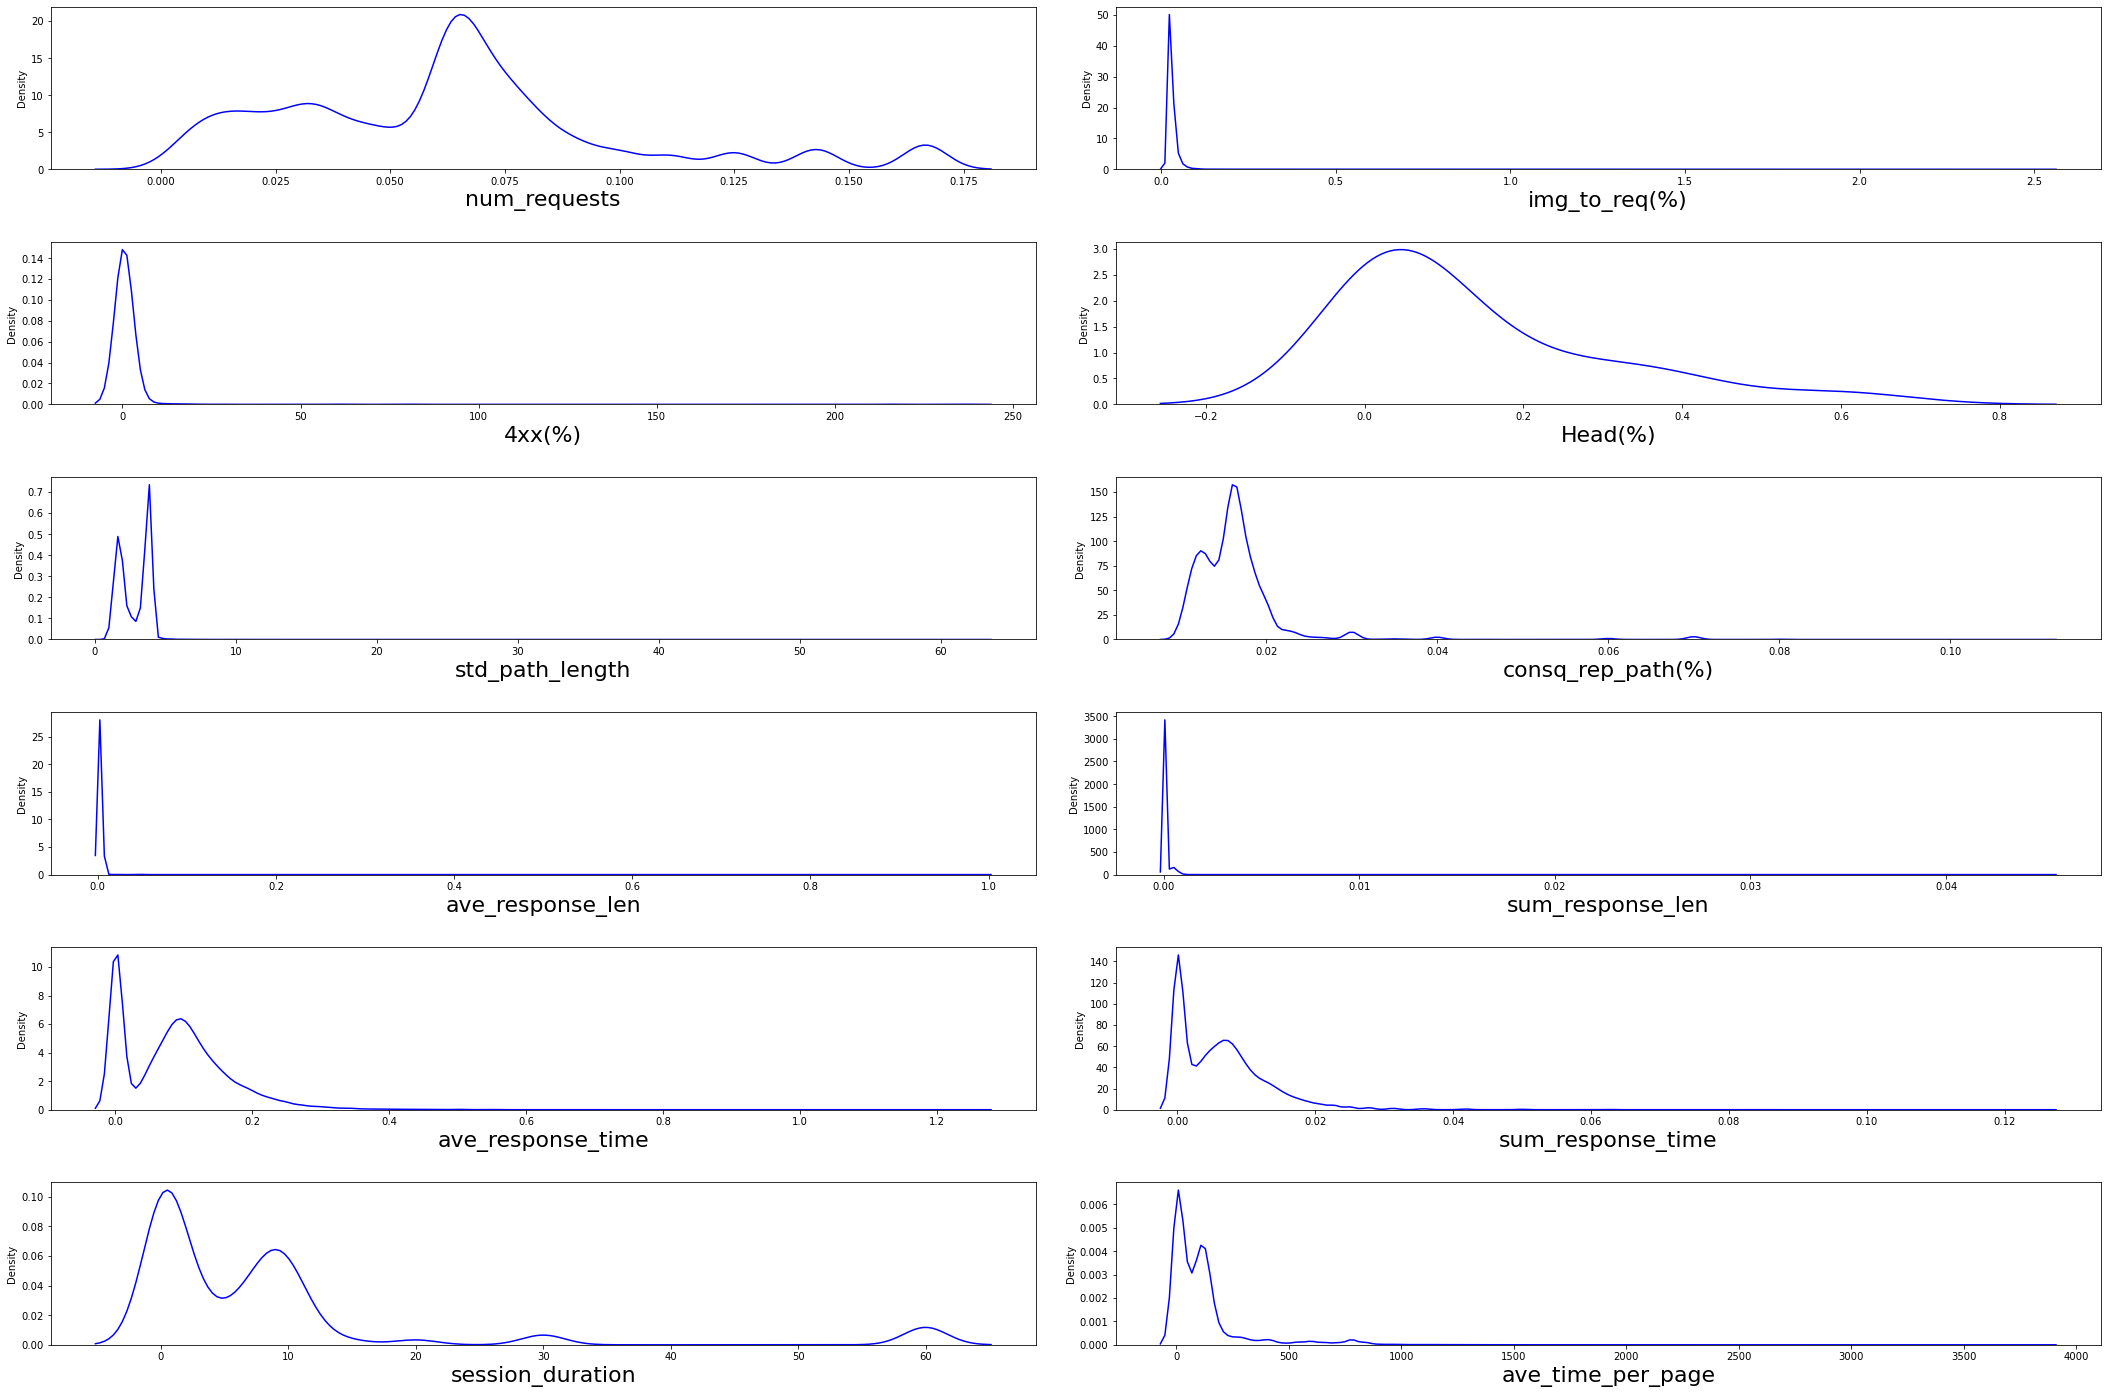

In [8]:
plt.figure(figsize=(30,20))

for idx, feature in enumerate(features):
    transformed_data = 1 / df[feature]
    ax = plt.subplot(6,2, idx + 1)
    
    sns.kdeplot(transformed_data,  ax=ax, color='blue')
    ax.set_xlabel(feature, fontsize = 22)

plt.tight_layout(pad = 3)
plt.show()

### Square Root Transformation

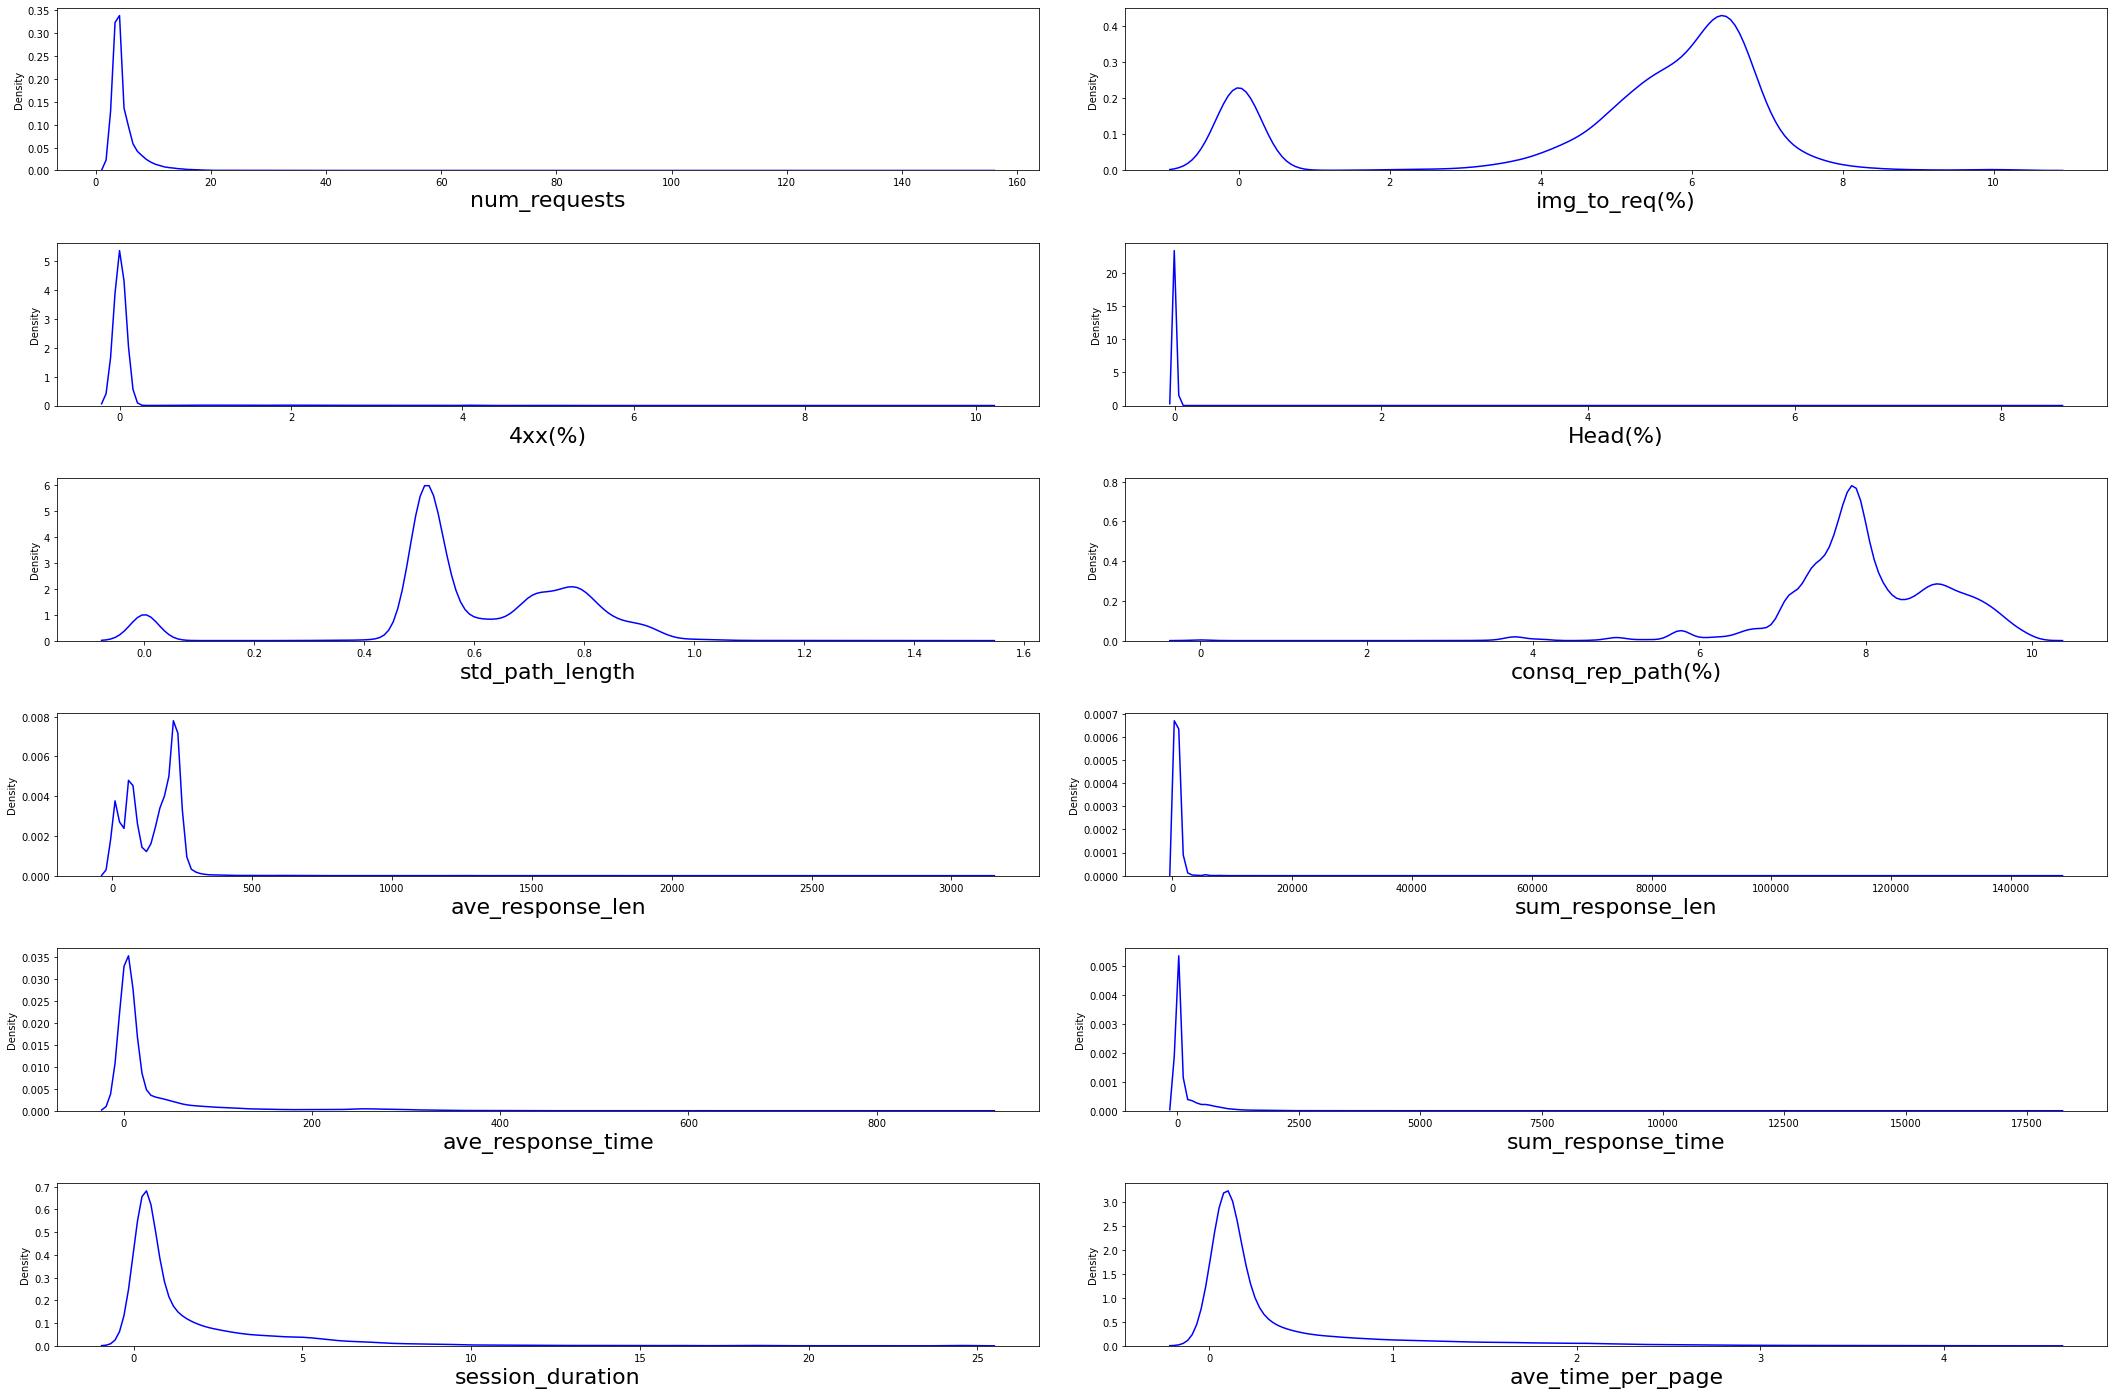

In [9]:
plt.figure(figsize=(30,20))

for idx, feature in enumerate(features):
    transformed_data = np.sqrt(df[feature])
    ax = plt.subplot(6,2, idx + 1)
    
    sns.kdeplot(transformed_data,  ax=ax, color='blue')
    ax.set_xlabel(feature, fontsize = 22)

plt.tight_layout(pad = 3)
plt.show()

### Exponential Transformation

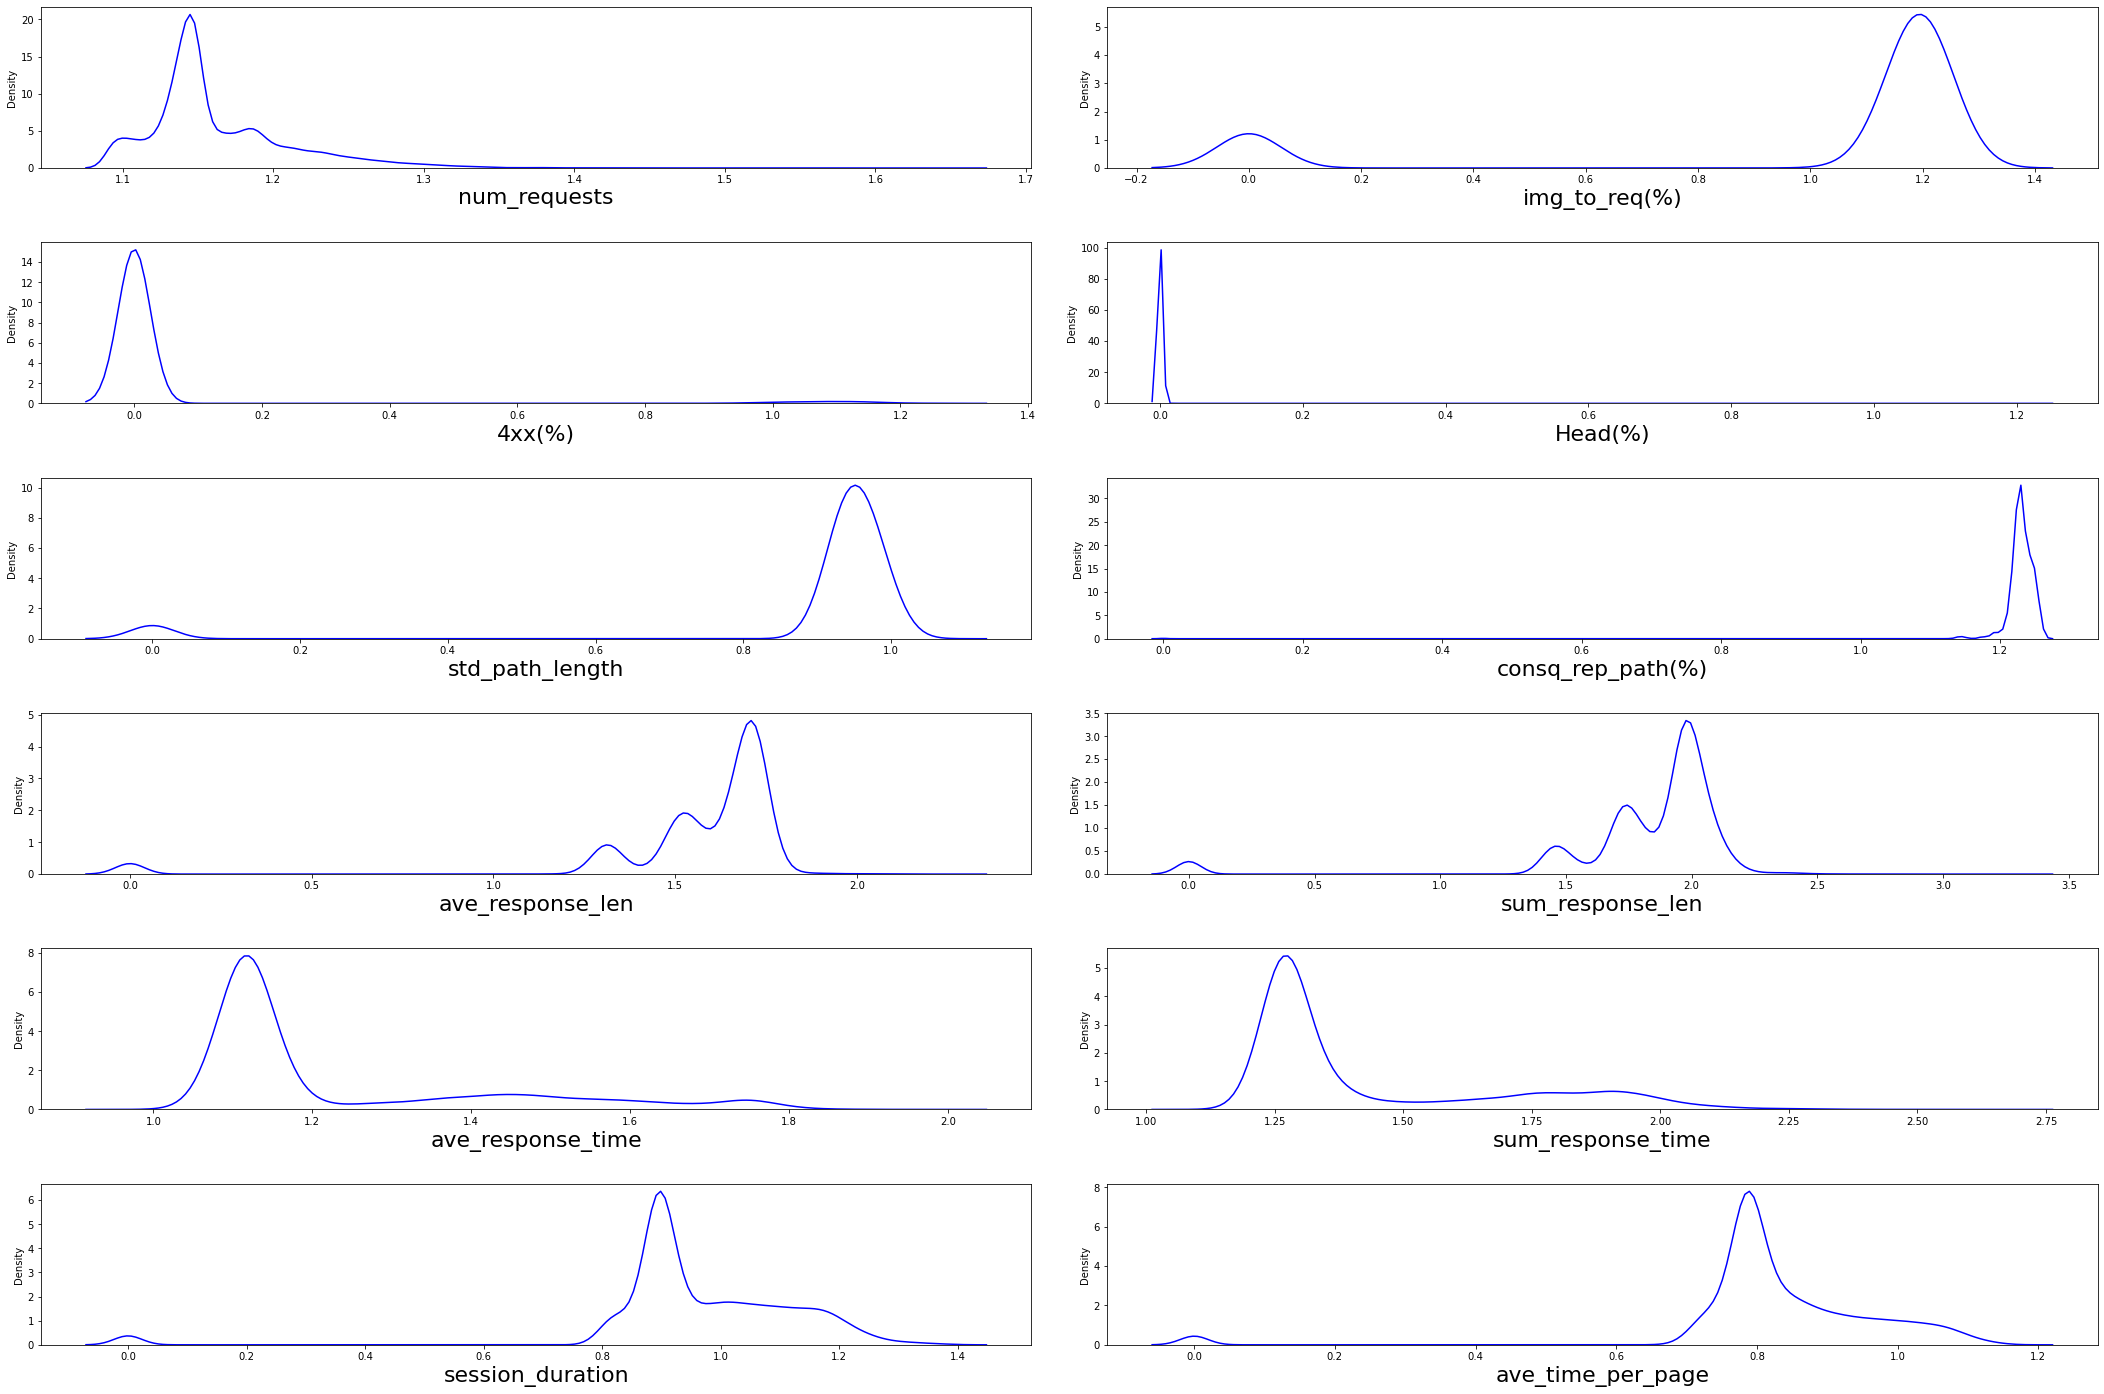

In [10]:
plt.figure(figsize=(30,20))

for idx, feature in enumerate(features):
    transformed_data = df[feature] ** (0.05)
    ax = plt.subplot(6,2, idx + 1)
    
    sns.kdeplot(transformed_data,  ax=ax, color='blue')
    ax.set_xlabel(feature, fontsize = 22)

plt.tight_layout(pad = 3)
plt.show()

### coxbox Transformation

C:\Anaconda\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Anaconda\lib\site-packages\scipy\optimize\optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
C:\Anaconda\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


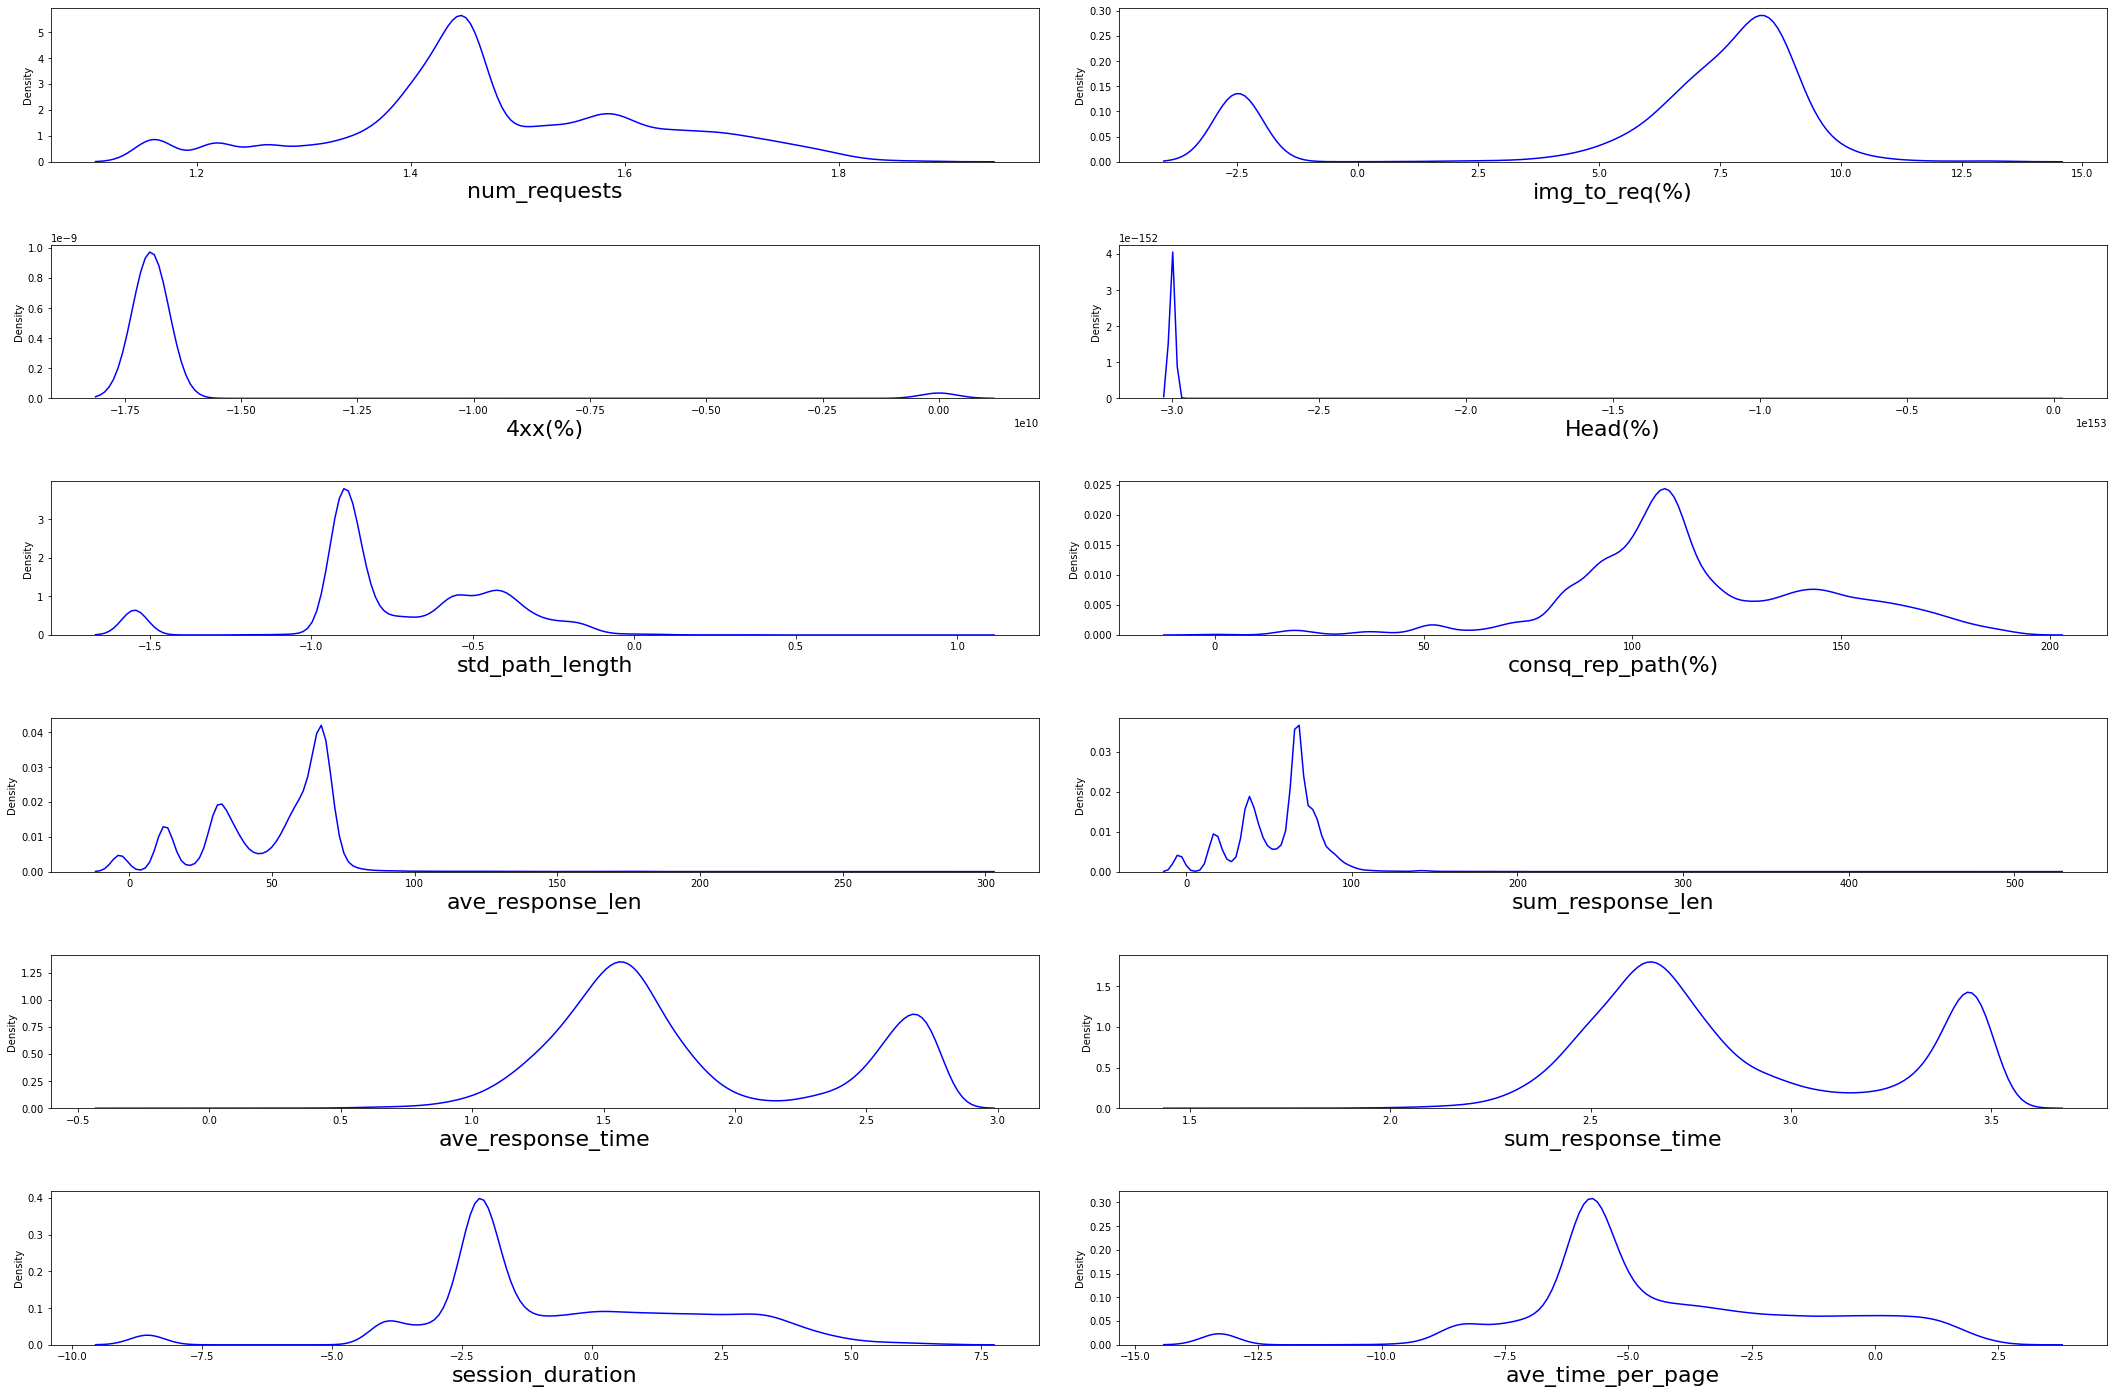

In [11]:
plt.figure(figsize=(30,20))

for idx, feature in enumerate(features):
    transformed_data, _ = boxcox(df[feature]+0.0001)
    ax = plt.subplot(6,2, idx + 1)
    
    sns.kdeplot(transformed_data,  ax=ax, color='blue')
    ax.set_xlabel(feature, fontsize = 22)

plt.tight_layout(pad = 3)
plt.show()